<a href="https://colab.research.google.com/github/anjunjin/PFE-ING3-IA/blob/master/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Partie "commune"

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
#DATA_PATH = "/content/drive/My Drive/PFE/"
DATA_PATH = "/content/drive/My Drive/Colab Notebooks/PFE/twitter/modele/"
data = pd.read_csv(DATA_PATH+"Tweets_nettoyés_210322.csv", encoding='utf-8').drop(['Unnamed: 0'], axis=1)
#data = pd.read_csv(DATA_PATH+"Tweets_parsed.csv", encoding='utf-8').drop(['Unnamed: 0'], axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# data = data.sample(n=20000, replace=False, random_state=42)

In [ ]:
data.shape

(722280, 10)

In [ ]:
# data.sort_values(by = 'cleaned').tail(100)

In [ ]:
data = data.dropna()

In [ ]:
# data.sort_values(by = 'cleaned').tail(100)

In [ ]:
data.shape

(721518, 10)

In [ ]:
!pip install scattertext

     |████████████████████████████████| 7.3 MB 5.5 MB/s 
     |████████████████████████████████| 24.1 MB 1.8 MB/s 
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9309 sha256=c3bdfb73c48e2e773a10f494028dad895840dbe8fe3539e0fb7cb630891043d3
  Stored in directory: /root/.cache/pip/wheels/cb/19/58/4e8fdd0009a7f89dbce3c18fff2e0d0fa201d5cdfd16f113b7
Successfully built flashtext
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import scattertext as st
"""import spacy
from spacy.tokenizer import Tokenizer
from spacy.lang.fr import French"""
import numpy as np
import math

In [ ]:
# spacy.cli.download('fr_core_news_md')

In [ ]:
# nlp = spacy.load("fr_core_news_md")

In [ ]:
# data = data.drop(data[data.index.isin([35203, 35220, 111663, 111664, 111665, 111666, 111667, 142467, 247758, 249448, 458701, 545318, 545319, 548835, 549118, 550069, 584385, 584386, 584387, 596245, 596709, 596779, 634646, 663672, 663701, 663706, 700933])].index)

In [ ]:
# data

In [ ]:
"""mask = data.applymap(lambda x: x is None)
cols = data.columns[(mask).any()]
for col in data[cols]:
    data.loc[mask[col], col] = ''
data"""

"""test_list = list(data['cleaned'])
res = list(filter(None, test_list))
data['cleaned'] = pd.DataFrame(res)"""

"test_list = list(data['cleaned'])\nres = list(filter(None, test_list))\ndata['cleaned'] = pd.DataFrame(res)"

In [ ]:
# data

In [ ]:
data = data.dropna()

In [ ]:
data.shape

(721518, 10)

In [ ]:
"""data['cleaned'].tolist()"""

"data['cleaned'].tolist()"

In [ ]:
# transmettre les liste de mots en phrase(texte)
def return_text(result):
  result_txt = result.text
  return result_txt

In [ ]:
list_percent_rt = []
list_percent_fav = []
for index, row in data.iterrows():
  list_percent_rt.append(row['retweet_count']/row['count_followers'])
  list_percent_fav.append(row['favorite_count']/row['count_followers'])
data['rt_per_followers'] = list_percent_rt
data['fav_per_followers'] = list_percent_fav

In [ ]:
data

,liability,liability_label,description,user_screen_name,retweet_count,favorite_count,count_followers,tweet,cleaned,tagged,rt_per_followers,fav_per_followers
0,1,site plutôt douteux,France-Soir était un journal fondé par Pierre ...,france_soir,50.0,101.0,98322.0,🚨Le professeur Raoult écope d’un blâme de l’Or...,🚨le professeur raoult écope ’un blâme ’ordre m...,🚨_SCONJ Le_DET professeur_NOUN Raoult_PROPN éc...,0.000509,0.001027
1,1,site plutôt douteux,France-Soir était un journal fondé par Pierre ...,france_soir,643.0,0.0,98322.0,RT @DIVIZIO1: Recours déposé !,rt recours déposé,RT_X @DIVIZIO1_PROPN :_PUNCT Recours_NOUN dépo...,0.006540,0.000000
2,1,site plutôt douteux,France-Soir était un journal fondé par Pierre ...,france_soir,27.0,59.0,98322.0,"🎙BEST OF - Pr Michel Drancourt : IHU, épidémie...",🎙best of pr michel drancourt ihu épidémies dhi...,🎙_NOUN BEST_X OF_PROPN -_PUNCT Pr_X Michel_PRO...,0.000275,0.000600
3,1,site plutôt douteux,France-Soir était un journal fondé par Pierre ...,france_soir,14.0,37.0,98322.0,"📚 Jonathan Curiel, directeur général adjoint d...",📚 jonathan curiel directeur général adjoint pr...,"📚_PROPN Jonathan_PROPN Curiel_PROPN ,_PUNCT di...",0.000142,0.000376
4,1,site plutôt douteux,France-Soir était un journal fondé par Pierre ...,france_soir,39.0,79.0,98322.0,🖍 Le dessin du jour\n&gt; à retrouver sur http...,🖍 dessin jour retrouver desident_link desiden...,🖍_NOUN Le_DET dessin_PROPN du_DET jour_NOUN \n...,0.000397,0.000803
...,...,...,...,...,...,...,...,...,...,...,...,...
722275,0,site plutôt fiable,Un site qui donne des conseils et astuces sur ...,wikiHow,1.0,1.0,73496.0,@aubreyrumore wikiHow loves you more tho,wikihow loves you more tho,@aubreyrumore_PROPN wikiHow_X loves_X you_X mo...,0.000014,0.000014
722276,0,site plutôt fiable,Un site qui donne des conseils et astuces sur ...,wikiHow,8.0,19.0,73496.0,"""i.e. = """"id est"""" (that is)\ne.g. = """"exempli...",ie id that is eg exempli gratia for the sake o...,"""_PUNCT i.e_NOUN ._PUNCT =_VERB ""_PUNCT ""_PUNC...",0.000109,0.000259
722277,0,site plutôt fiable,Un site qui donne des conseils et astuces sur ...,wikiHow,84.0,360.0,73496.0,@Thundercat https://t.co/5FYXI3t5Oa,desident_link,@Thundercat_PROPN https://t.co/5FYXI3t5Oa_PROPN,0.001143,0.004898
722278,0,site plutôt fiable,Un site qui donne des conseils et astuces sur ...,wikiHow,0.0,2.0,73496.0,"""Throw some D's on that"" - ancient proverb htt...",throw some ds that ancient proverb desident_li...,"""_PUNCT Throw_PROPN some_PROPN D'_ADP s_NOUN o...",0.000000,0.000027


# Séparation en 3

Divisier le model en 3 partie : train(60%), test(20%), valid(20%)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data[['cleaned']]
y = data['liability_label']

In [ ]:
# X : le tweet
# X = data['cleaned']
# X = data[['cleaned']]
X = data[['cleaned', 'tagged', 'count_followers', 'rt_per_followers', 'fav_per_followers']]

# y : site fiable / pas fiable
y = data['liability_label']
# y = data[['liability_label']]
# y = data[['liability_label', 'liability_label', 'liability_label', 'liability_label', 'liability_label']]

In [ ]:
X.head(10)

,cleaned,tagged,count_followers,rt_per_followers,fav_per_followers
0,🚨le professeur raoult écope ’un blâme ’ordre m...,🚨_SCONJ Le_DET professeur_NOUN Raoult_PROPN éc...,98322.0,0.000509,0.001027
1,rt recours déposé,RT_X @DIVIZIO1_PROPN :_PUNCT Recours_NOUN dépo...,98322.0,0.006540,0.000000
2,🎙best of pr michel drancourt ihu épidémies dhi...,🎙_NOUN BEST_X OF_PROPN -_PUNCT Pr_X Michel_PRO...,98322.0,0.000275,0.000600
3,📚 jonathan curiel directeur général adjoint pr...,"📚_PROPN Jonathan_PROPN Curiel_PROPN ,_PUNCT di...",98322.0,0.000142,0.000376
4,🖍 dessin jour retrouver desident_link desiden...,🖍_NOUN Le_DET dessin_PROPN du_DET jour_NOUN \n...,98322.0,0.000397,0.000803
5,🐖l214 annoncé déposé plainte mauvais traitemen...,🐖_PROPN L214_PROPN a_AUX annoncé_VERB avoir_AU...,98322.0,0.000529,0.001149
6,soutien dossier audelà porte plainte réinfoli...,Au_DET soutien_NOUN de_ADP ce_DET dossier_NOUN...,98322.0,0.000559,0.001637
7,🎥 heringuez défendu couple restaurateurs garde...,🎥_PROPN Me_NOUN Heringuez_PROPN a_AUX défendu_...,98322.0,0.002451,0.005045
8,’entretien complet desident_link,L’_DET entretien_NOUN complet_ADJ :_PUNCT http...,98322.0,0.000437,0.001017
9,best of 🎙️ guadeloupe ellen bessis soumïâa say...,BEST_NOUN OF_PROPN -_PUNCT 🎙_ADV ️_ADJ En_ADP ...,98322.0,0.003834,0.005614


In [ ]:
y.head(10)

0    site plutôt douteux
1    site plutôt douteux
2    site plutôt douteux
3    site plutôt douteux
4    site plutôt douteux
5    site plutôt douteux
6    site plutôt douteux
7    site plutôt douteux
8    site plutôt douteux
9    site plutôt douteux
Name: liability_label, dtype: object

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
# 100% dataset : 80% train 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# 80% dataset(train) : 80%*0.75=60% train  80%*0.25=20% test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [ ]:
print("X_train.shape : ",X_train.shape,", X_val.shape : ",X_val.shape, ", X_test.shape : ",X_test.shape)

X_train.shape :  (432910, 5) , X_val.shape :  (144304, 5) , X_test.shape :  (144304, 5)


In [ ]:
print("y_train.shape : ",y_train.shape,", y_val.shape : ",y_val.shape, ", y_test.shape : ",y_test.shape)

y_train.shape :  (432910,) , y_val.shape :  (144304,) , y_test.shape :  (144304,)


Visualiser le distribution de model

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X_test.count()[0]

144304

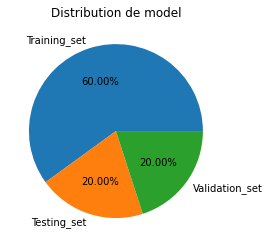

In [ ]:
# model_size = np.array([X_train.count(), X_test.count(), X_val.count()])
model_size = np.array([X_train.count()[0], X_test.count()[0], X_val.count()[0]])

plt.pie(model_size,
        # labels de pie chart
        labels=['Training_set','Testing_set','Validation_set'], 
        # pourcentage
        autopct='%.2f%%', 
       )
plt.title("Distribution de model")
plt.show()

X_train_50000

In [ ]:
data_50000 = data.sample(n = 84000, replace=False, random_state=42)
data_50000.shape



(84000, 12)

In [ ]:
X_50000 = data_50000[['cleaned']]
y_50000 = data_50000['liability_label']

In [ ]:
# 100% dataset : 80% train 20% test
X_train_50000, X_test_50000, y_train_50000, y_test_50000 = train_test_split(X_50000, y_50000, test_size=0.2, random_state=1)
# 80% dataset(train) : 80%*0.75=60% train  80%*0.25=20% test
X_train_50000, X_val_50000, y_train_50000, y_val_50000 = train_test_split(X_train_50000, y_train_50000, test_size=0.25, random_state=1)
print("X_train.shape : ",X_train_50000.shape,", X_val.shape : ",X_val_50000.shape, ", X_test.shape : ",X_test_50000.shape)

X_train.shape :  (50400, 1) , X_val.shape :  (16800, 1) , X_test.shape :  (16800, 1)


In [ ]:
data_100000 = data.sample(n = 170000, replace=False, random_state=42)
data_100000.shape

(170000, 12)

In [ ]:
X_100000 = data_100000[['cleaned']]
y_100000 = data_100000['liability_label']

In [ ]:
# 100% dataset : 80% train 20% test
X_train_100000, X_test_100000, y_train_100000, y_test_100000 = train_test_split(X_100000, y_100000, test_size=0.2, random_state=1)
# 80% dataset(train) : 80%*0.75=60% train  80%*0.25=20% test
X_train_100000, X_val_100000, y_train_100000, y_val_100000 = train_test_split(X_train_100000, y_train_100000, test_size=0.25, random_state=1)
print("X_train.shape : ",X_train_100000.shape,", X_val.shape : ",X_val_100000.shape, ", X_test.shape : ",X_test_100000.shape)

X_train.shape :  (102000, 1) , X_val.shape :  (34000, 1) , X_test.shape :  (34000, 1)


In [ ]:
data_200000 = data.sample(n = 340000, replace=False, random_state=42)
data_200000.shape

(340000, 12)

In [ ]:
X_200000 = data_200000[['cleaned']]
y_200000 = data_200000['liability_label']

In [ ]:
# 100% dataset : 80% train 20% test
X_train_200000, X_test_200000, y_train_200000, y_test_200000 = train_test_split(X_200000, y_200000, test_size=0.2, random_state=1)
# 80% dataset(train) : 80%*0.75=60% train  80%*0.25=20% test
X_train_200000, X_val_200000, y_train_200000, y_val_200000 = train_test_split(X_train_200000, y_train_200000, test_size=0.25, random_state=1)
print("X_train.shape : ",X_train_200000.shape,", X_val.shape : ",X_val_200000.shape, ", X_test.shape : ",X_test_200000.shape)

X_train.shape :  (204000, 1) , X_val.shape :  (68000, 1) , X_test.shape :  (68000, 1)


# Bag of words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# créer un objet de CountVectorizer
countvectorizer = CountVectorizer()
# countvectorizer = CountVectorizer(min_df=50, max_df=0.95)

In [ ]:
# fonction Bag_of_words 
# Entrée : list de tweet
# Sortie : vecteurs de tweet
def bag_of_words(text):
  bag = countvectorizer.fit_transform(text)
  return bag

In [ ]:
# un exemple de test
"""exemple = X_train[0]
exemple1 = X_train[10]
exemple2 = X_train[20]

print('exemple : ', exemple)
print('exemple1 : ', exemple1)
print('exemple2 : ', exemple2)


bag = bag_of_words([exemple, exemple1,exemple2])
bag.toarray()
feature_names = countvectorizer.get_feature_names()
pd.DataFrame(bag.toarray(), columns=feature_names)
"""

"exemple = X_train[0]\nexemple1 = X_train[10]\nexemple2 = X_train[20]\n\nprint('exemple : ', exemple)\nprint('exemple1 : ', exemple1)\nprint('exemple2 : ', exemple2)\n\n\nbag = bag_of_words([exemple, exemple1,exemple2])\nbag.toarray()\nfeature_names = countvectorizer.get_feature_names()\npd.DataFrame(bag.toarray(), columns=feature_names)\n"

In [ ]:
tweet = np.array(X_train)

In [ ]:
len(X_train)

432910

In [ ]:
#bag = countvectorizer.fit_transform(tweet)
#bag.toarray()

In [ ]:
#feature_names = countvectorizer.get_feature_names()
#pd.DataFrame(bag.toarray(), columns=feature_names)

In [ ]:
#len(tweet)

In [ ]:
"""text = []
for tweet in X_train:
  text.append(tweet)
print(text)

bag = bag_of_words(text)
bag.toarray()"""

'text = []\nfor tweet in X_train:\n  text.append(tweet)\nprint(text)\n\nbag = bag_of_words(text)\nbag.toarray()'

# TF-IDF

In [ ]:
X_train.shape

(432910, 5)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer(min_df=10, max_df=0.9)
vectorizer_cleaned = TfidfVectorizer(min_df=10, max_df=0.9)
vectorizer_tagged = TfidfVectorizer(min_df=10, max_df=0.9)
# X_cleaned = vectorizer.fit_transform(X_train.tolist())
X_cleaned = vectorizer_cleaned.fit_transform(X_train['cleaned'].tolist())
X_tagged = vectorizer_tagged.fit_transform(X_train['tagged'].tolist())

In [ ]:
# print("X_cleaned.shape : ",X_cleaned.shape)
print("X_cleaned.shape : ",X_cleaned.shape,", X_tagged.shape : ",X_tagged.shape)

X_cleaned.shape :  (432910, 30811) , X_tagged.shape :  (432910, 37955)


In [ ]:
featured_names_cleaned = vectorizer_cleaned.get_feature_names()
featured_names_cleaned = vectorizer_tagged.get_feature_names()
print(len(featured_names_cleaned), len(featured_names_cleaned))

37955 37955


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(f'Feature names \n{featured_names_cleaned}')

Feature names 
['00', '000', '000_det', '000_noun', '000_num', '000_pron', '000_propn', '000_x', '007_num', '00_noun', '00_num', '00_pron', '01', '01_noun', '01_num', '01net_propn', '02', '02_num', '03', '03_noun', '03_num', '04', '04_num', '05', '05_det', '05_noun', '05_num', '05_propn', '06', '06_num', '07', '07_num', '08', '08_num', '08c1w3ouum_propn', '09', '09_noun', '09_num', '0_num', '0_propn', '0b7fce2c1c_propn', '0vo6guwjkd_propn', '10', '100', '10000_num', '1000_num', '1001_num', '100_num', '100_pron', '100_propn', '100e_adj', '101_num', '102_num', '103_num', '104_num', '105_num', '106_num', '107_num', '108_num', '109_num', '10_noun', '10_num', '10_pron', '10_propn', '10e_adj', '10h30_num', '10h35_noun', '10h35_num', '10h35_pron', '10h_noun', '10h_num', '10h_pron', '10pm_num', '10th_x', '10ème_adj', '11', '110_num', '111_num', '112_num', '113_num', '114_num', '115_num', '116_num', '117_num', '118_num', '119_num', '11_det', '11_noun', '11_num', '11_pron', '11_propn', '11e_adj'

In [ ]:
print(vectorizer_cleaned.get_feature_names_out())
print('\n')
print(X.shape)

['a1' 'a11' 'a113' ... 'من' 'والروحية' 'وراء']


(721518, 5)


#A faire

Nettoyage de tous les tweets maintenant (lancer la nuit)

pour les tweets d'entrainement : faire un sample sur tous les tweets, pas grave si répartition aléatoire

Les trucs envoyés sur Facebook

tester word2vec (et glove aussi)

ANJUNJIN/

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X_train = X_train_50000

In [ ]:
X_train.shape

(50400, 1)

In [ ]:
y_train = y_train_50000

In [ ]:
y_train.shape

(50400,)

In [ ]:
X_test.shape

(144304, 5)

In [ ]:
# vectorizer = TfidfVectorizer(min_df=10, max_df=0.9)
vectorizer_cleaned = TfidfVectorizer(min_df=10, max_df=0.9)
# X_cleaned = vectorizer.fit_transform(X_train.tolist())
Train_X_cleaned_Tfidf = vectorizer_cleaned.fit_transform(X_train['cleaned'])
Test_X_cleaned_Tfidf = vectorizer_cleaned.transform(X_test['cleaned'])

In [ ]:
Train_X_cleaned_Tfidf.shape

(50400, 6476)

In [ ]:
Test_X_cleaned_Tfidf.shape

(144304, 6476)

In [ ]:
Train_X_cleaned_Tfidf_100000 = vectorizer_cleaned.fit_transform(X_train_100000['cleaned'])
Test_X_cleaned_Tfidf_100000 = vectorizer_cleaned.transform(X_test_100000['cleaned'])

In [ ]:
Train_X_cleaned_Tfidf_100000.shape

(102000, 11467)

In [ ]:
Test_X_cleaned_Tfidf_100000.shape

(34000, 11467)

In [ ]:
from sklearn.metrics import matthews_corrcoef

In [ ]:
def evaluate_model(model, df_sample, y_true) : 
  y_pred = model.predict(df_sample)

  print(f"MCC : {matthews_corrcoef(y_true, y_pred)}")

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.metrics import matthews_corrcoef

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
def test_model_rd(model_type, dict_params) : 
  pipeline = Pipeline(steps=[('truncatedSVD', TruncatedSVD()),
                             ('clf', model_type)])
  model_rd = RandomizedSearchCV(pipeline,
                                dict_params,
                                scoring=None,
                                n_iter=10,
                                cv=5,
                                n_jobs=-1,
                                random_state=42,
                                verbose=1)
  best_rd_model = model_rd.fit(Train_X_cleaned_Tfidf,y_train)
  return best_rd_model 

In [ ]:
Train_X_cleaned_Tfidf.shape

(50400, 6476)

In [ ]:
def test_model_rd_100000(model_type, dict_params) : 
  pipeline = Pipeline(steps=[('truncatedSVD', TruncatedSVD()),
                             ('clf', model_type)])
  model_rd = RandomizedSearchCV(pipeline,
                                dict_params,
                                scoring=None,
                                n_iter=10,
                                cv=5,
                                n_jobs=-1,
                                random_state=42,
                                verbose=1)
  best_rd_model = model_rd.fit(Train_X_cleaned_Tfidf_100000,y_train_100000)
  return best_rd_model 

In [ ]:
Train_X_cleaned_Tfidf_100000.shape

(102000, 11467)

In [ ]:
mlp = MLPClassifier(
                    batch_size=5000, 
                    random_state=42, 
                    )

dict_params = dict(truncatedSVD__n_components = [50, 100, 500],
                   clf__hidden_layer_sizes = [(50,), (100,), (50,50)],
                   clf__learning_rate_init = [0.01,0.1])
model_tfidf_mlp = test_model_rd(mlp, dict_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
model_tfidf_mlp.best_params_

{'clf__hidden_layer_sizes': (50, 50),
 'clf__learning_rate_init': 0.1,
 'truncatedSVD__n_components': 50}

In [ ]:
# predict the labels on validation dataset
predictions_MLP_train = model_tfidf_mlp.predict(Train_X_cleaned_Tfidf)
predictions_MLP_test = model_tfidf_mlp.predict(Test_X_cleaned_Tfidf)

# Use accuracy_score function to get the accuracy
print("MLP Accuracy Score Train -> ",accuracy_score(predictions_MLP_train, y_train)*100)
print("MLP Accuracy Score Test -> ",accuracy_score(predictions_MLP_test, y_test)*100)

MLP Accuracy Score Train ->  72.83531746031746
MLP Accuracy Score Test ->  71.75338174963964


In [ ]:
evaluate_model(model_tfidf_mlp,Train_X_cleaned_Tfidf,y_train)

MCC : 0.17928776248319508


In [ ]:
evaluate_model(model_tfidf_mlp,Test_X_cleaned_Tfidf,y_test)

MCC : 0.13259522306761734


In [ ]:
mlp_100000 = MLPClassifier(
                    batch_size=5000, 
                    random_state=42, 
                    )

dict_params = dict(truncatedSVD__n_components = [50, 100, 500],
                   clf__hidden_layer_sizes = [(50,), (100,), (50,50)],
                   clf__learning_rate_init = [0.01,0.1])
model_tfidf_mlp_100000 = test_model_rd_100000(mlp_100000, dict_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
model_tfidf_mlp_100000.best_params_

{'clf__hidden_layer_sizes': (50,),
 'clf__learning_rate_init': 0.01,
 'truncatedSVD__n_components': 50}

In [ ]:
# predict the labels on validation dataset
predictions_MLP_train_100000 = model_tfidf_mlp_100000.predict(Train_X_cleaned_Tfidf_100000)
predictions_MLP_test_100000 = model_tfidf_mlp_100000.predict(Test_X_cleaned_Tfidf_100000)

# Use accuracy_score function to get the accuracy
print("MLP Accuracy Score Train -> ",accuracy_score(predictions_MLP_train_100000, y_train_100000)*100)
print("MLP Accuracy Score Test -> ",accuracy_score(predictions_MLP_test_100000, y_test_100000)*100)

MLP Accuracy Score Train ->  73.49117647058824
MLP Accuracy Score Test ->  72.23235294117647


In [ ]:
evaluate_model(model_tfidf_mlp_100000,Train_X_cleaned_Tfidf_100000,y_train_100000)

MCC : 0.20325023092117722


In [ ]:
evaluate_model(model_tfidf_mlp_100000,Test_X_cleaned_Tfidf_100000,y_test_100000)

MCC : 0.15233284947467274


In [ ]:
Train_X_cleaned_Tfidf_200000 = vectorizer_cleaned.fit_transform(X_train_200000['cleaned'])
Test_X_cleaned_Tfidf_200000 = vectorizer_cleaned.transform(X_test_200000['cleaned'])

In [ ]:
Train_X_cleaned_Tfidf_200000.shape

(204000, 18787)

In [ ]:
Test_X_cleaned_Tfidf_200000.shape

(68000, 18787)

In [ ]:
def test_model_rd_200000(model_type, dict_params) : 
  pipeline = Pipeline(steps=[('truncatedSVD', TruncatedSVD()),
                             ('clf', model_type)])
  model_rd = RandomizedSearchCV(pipeline,
                                dict_params,
                                scoring=None,
                                n_iter=10,
                                cv=5,
                                n_jobs=-1,
                                random_state=42,
                                verbose=1)
  best_rd_model = model_rd.fit(Train_X_cleaned_Tfidf_200000,y_train_200000)
  return best_rd_model 

In [ ]:
Train_X_cleaned_Tfidf_200000.shape

(204000, 18787)

In [ ]:
mlp_200000 = MLPClassifier(
                    batch_size=5000, 
                    random_state=42, 
                    )

dict_params = dict(truncatedSVD__n_components = [50, 100, 500],
                   clf__hidden_layer_sizes = [(50,), (100,), (50,50)],
                   clf__learning_rate_init = [0.01,0.1])
model_tfidf_mlp_200000 = test_model_rd_200000(mlp_200000, dict_params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
model_tfidf_mlp_200000.best_params_

{'clf__hidden_layer_sizes': (50,),
 'clf__learning_rate_init': 0.01,
 'truncatedSVD__n_components': 100}

In [ ]:
# predict the labels on validation dataset
predictions_MLP_train_200000 = model_tfidf_mlp_200000.predict(Train_X_cleaned_Tfidf_200000)
predictions_MLP_test_200000 = model_tfidf_mlp_200000.predict(Test_X_cleaned_Tfidf_200000)

# Use accuracy_score function to get the accuracy
print("MLP Accuracy Score Train -> ",accuracy_score(predictions_MLP_train_200000, y_train_200000)*100)
print("MLP Accuracy Score Test -> ",accuracy_score(predictions_MLP_test_200000, y_test_200000)*100)

MLP Accuracy Score Train ->  74.5392156862745
MLP Accuracy Score Test ->  73.42941176470589


In [ ]:
evaluate_model(model_tfidf_mlp_200000,Train_X_cleaned_Tfidf_200000,y_train_200000)

MCC : 0.2768190599229107


In [ ]:
evaluate_model(model_tfidf_mlp_200000,Test_X_cleaned_Tfidf_200000,y_test_200000)

MCC : 0.23190310875502781
